In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
dnames=[]
dprices=[]
dratings=[]
dspecifications=[]
drd=[]
count=[]
for o in range(1,43):
    source="https://www.flipkart.com/search?q=realme%20mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page"+str(o)
    response=requests.get(source)
    soup=BeautifulSoup(response.content,"html.parser")
    #product=soup.find('div',attrs={'class':'_4rR01T'})
    #print(product.text) #Cellecor E10
    #for all mobiles,we need to write a loop
    for a in soup.findAll('a',href=True,attrs={'class':'_1fQZEK'}):
        if(a is None):
            continue
        else:
        #print("hai")
            name=a.find('div',attrs={'class':'_4rR01T'})
            price=a.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
            rating=a.find('div',attrs={'class':'_3LWZlK'})
            specification=a.find('div',attrs={'class':'fMghEO'})
            c=a.find('span',attrs={'class':'_2_R_DZ'})
            #reviewdata=soup.find_all('a',{'class':'_1fQZEK'})
            #h=rating.text
            if((rating is None) or (name is None) or (price is None) or (specification is None)):
                continue
            else:
                d=a.get("href")
                dnames.append(name.text)
                dprices.append(price.text)
                dspecifications.append(specification.text)
                dratings.append(rating.text)
                drd.append(d)
                count.append(c)
    #df.head()
    #print("___________________________________________________________________________")
    print("in page"+str(o))
    df=pd.DataFrame({"product name":dnames,"prices":dprices,"count":count,"rating":dratings,"specifiactions":dspecifications,"reviewdata":drd})
    print(df)
    print("_________________________________________________________________________________________________________")
"""
print(len(names))
print(len(prices))
print(len(ratings))
print(len(specifications))
#print(names)"""
model=pd.DataFrame(data=df)
model.to_csv("redmi_mobiles.csv")
print("done..!")

In [2]:
import pandas as pd
df=pd.read_csv("redmi_mobiles.csv")
df

,Unnamed: 0,product name,prices,count,rating,specifiactions,reviewdata
0,0,"REDMI A1+ (Light Blue, 32 GB)","₹6,599","<span class=""_2_R_DZ""><span><span>4,301 Rating...",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,/redmi-a1-light-blue-32-gb/p/itmae4738195e03c?...
1,1,"REDMI 10 (Shadow Black, 64 GB)","₹9,499","<span class=""_2_R_DZ""><span><span>2,37,746 Rat...",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,/redmi-10-shadow-black-64-gb/p/itm0f35cd8b6229...
2,2,"REDMI A1+ (Light Green, 32 GB)","₹6,599","<span class=""_2_R_DZ""><span><span>4,301 Rating...",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,/redmi-a1-light-green-32-gb/p/itm7ddf6868555cf...
3,3,"REDMI 10 (Caribbean Green, 128 GB)","₹10,999","<span class=""_2_R_DZ""><span><span>39,390 Ratin...",4.2,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,/redmi-10-caribbean-green-128-gb/p/itm2389889c...
4,4,"REDMI A1+ (Black, 32 GB)","₹6,599","<span class=""_2_R_DZ""><span><span>4,301 Rating...",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,/redmi-a1-black-32-gb/p/itm7c286db936fbd?pid=M...
...,...,...,...,...,...,...,...
662,662,Peace Mi2 Pro,₹799,"<span class=""_2_R_DZ""><span><span>5 Ratings </...",4.6,64 MB RAM | 32 MB ROM5.08 cm (2 inch) Display0...,/peace-mi2-pro/p/itm903e9134a5a18?pid=MOBGBPBY...
663,663,"11 Lite NE (Diamond Dazzle, 128 GB)","₹24,990","<span class=""_2_R_DZ""><span><span>63 Ratings <...",4.0,8 GB RAM | 128 GB ROM16.64 cm (6.55 inch) Disp...,/11-lite-ne-diamond-dazzle-128-gb/p/itmbc33dfc...
664,664,"11 Lite NE (Jazz Blue, 128 GB)","₹22,990","<span class=""_2_R_DZ""><span><span>14 Ratings <...",3.5,6 GB RAM | 128 GB ROM16.64 cm (6.55 inch) Disp...,/11-lite-ne-jazz-blue-128-gb/p/itmbc33dfc42d8b...
665,665,"Mi A3 (More Than White, 64 GB)","₹13,800","<span class=""_2_R_DZ""><span><span>38,851 Ratin...",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,/mi-a3-more-than-white-64-gb/p/itm58e6b4a83b04...


In [5]:
# SCRAPING REVIEWS OF A PRODUCTDD
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
reviewtitles=[]
reviewbodies=[]
reviewrating=[]
pagecount=200
name=df["reviewdata"][0].split("&")[0]
lid=df["reviewdata"][0].split("&")[1]
for i in range(1,pagecount+1):
    # base_link="https://www.flipkart.com/samsung-galaxy-f13-waterfall-blue-128-gb/product-reviews/itm85a305642eb7b?pid=MOBGENJWVWYAAVG5&lid=LSTMOBGENJWVWYAAVG5AKPCP0&marketplace=FLIPKART"
    url="https://www.flipkart.com"+name+"&"+lid+"&MARKETPLACE=FLIPKART&page="+str(i)
    source=url.replace("/p/","/product-reviews/")
    response=requests.get(source)
    soup=BeautifulSoup(response.content,"html.parser")
    #print("hai1")
    for a in soup.findAll('p',class_='_2-N8zT'):
    #print("hai1")
        rv=a.text
        reviewtitles.append(rv)
   # print("hai1")
    for b in soup.findAll('div',class_='t-ZTKy'):
    #print("hai1")
        rb=b.text
        reviewbodies.append(rb)
    for c in soup.findAll('div',class_='col _2wzgFH K0kLPL'):
    #print("hai1")
        if(c is None):
            reviewrating.append(np.nan)
        else:
            ra=c.text
            reviewrating.append(ra)
    print("done_page_"+str(i),end="")
print(len(reviewtitles))
#print(len(reviewbodies))
#print(len(reviewtitles))
#print(len(reviewbodies))
#print(len(reviewrating))
df1=pd.DataFrame({"review_title":reviewtitles,"reviewbodies":reviewbodies,"reviewrating":reviewrating})
#print(df1)
#model1=pd.DataFrame(data=df1)
#model1.to_csv("reviews.csv")
print("done..!")
print(len(reviewtitles))
print(len(reviewbodies))
print(len(reviewrating))
df1

done_page_1done_page_2done_page_3done_page_4done_page_5done_page_6done_page_7done_page_8done_page_9done_page_10done_page_11done_page_12done_page_13done_page_14done_page_15done_page_16done_page_17done_page_18done_page_19done_page_20done_page_21done_page_22done_page_23done_page_24done_page_25done_page_26done_page_27done_page_28done_page_29done_page_30done_page_31done_page_32done_page_33done_page_34done_page_35done_page_36done_page_37done_page_38done_page_39done_page_40done_page_41done_page_42done_page_43done_page_44done_page_45done_page_46done_page_47done_page_48done_page_49done_page_50done_page_51done_page_52done_page_53done_page_54done_page_55done_page_56done_page_57done_page_58done_page_59done_page_60done_page_61done_page_62done_page_63done_page_64done_page_65done_page_66done_page_67done_page_68done_page_69done_page_70done_page_71done_page_72done_page_73done_page_74done_page_75done_page_76done_page_77done_page_78done_page_79done_page_80done_page_81done_page_82done_page_83done_page_84d

,review_title,reviewbodies,reviewrating
0,Really Nice,"I gifted my mom,,READ MORE","4Really NiceI gifted my mom,,READ MOREFlipkart..."
1,Terrific purchase,Very Good product this range..READ MORE,5Terrific purchaseVery Good product this range...
2,Simply awesome,Nice mobileREAD MORE,5Simply awesomeNice mobileREAD MORESyed Mubara...
3,Must buy!,Better productStock Android...5000 mah Battery...,5Must buy!Better productStock Android...5000 m...
4,Terrific purchase,Super phoneREAD MORE,5Terrific purchaseSuper phoneREAD MOREVelari J...
...,...,...,...
232,Super!,SuperREAD MORE,5Super!SuperREAD MOREMangal SinghCertified Buy...
233,Perfect product!,Good phone for low priceREAD MORE,5Perfect product!Good phone for low priceREAD ...
234,Could be way better,Looking hot battery no lake boringREAD MORE,2Could be way betterLooking hot battery no lak...
235,Awesome,Nice phoneREAD MORE,5AwesomeNice phoneREAD MORELalan Kumar RoyCer...


In [8]:
import numpy as np
import pandas as pd
import nltk # natural language toolkit
from nltk.sentiment.vader import SentimentIntensityAnalyzer #vader ----> collection of words
import re
from textblob import TextBlob  # sentiment analysis,classification
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline();                                         # to display plot in notebook
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from cleantext import clean

pd.set_option('display.max_columns',None)   # to watch every data(column)

In [11]:
df1["reviewbodies"][0]

'i gifted my mom,,'

In [12]:
for i in df1.index:
    text=df1['reviewbodies'][i].replace("READ MORE","")
    df1['reviewbodies'][i]=clean(text,no_emoji=True)

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df1[['polarity','subjectivity']]=df1['reviewbodies'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index,row in df1['reviewbodies'].iteritems():
    score=SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg=score['neg']
    neu=score['neu']
    pos=score['pos']
    if neg>pos:
        df1.loc[index,'sentiment']='Negative'
    elif pos>neg:
        df1.loc[index,'sentiment']='Positive'
    else:
        df1.loc[index,'sentiment']='Neutral'

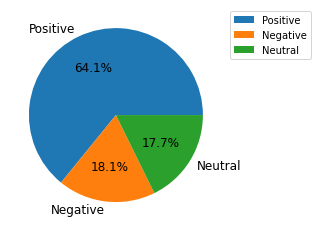

In [14]:
import matplotlib.pyplot as plt
label=df1['sentiment'].value_counts().index
values=df1['sentiment'].value_counts().values
plt.pie(values,labels=label,autopct="%3.1f%%",textprops={"fontsize":12})
plt.legend(bbox_to_anchor=[1,1])

In [6]:
print(len(reviewtitles))
print(len(reviewbodies))
print(len(reviewrating))

237
237
237
